# **Сравнение методов классификации**

In [2]:
import pandas as pd
# Загрузка данных
file_path = "C:\\Users\\Ангелина\\winequality-red.csv"
data = pd.read_csv(file_path)

# Просмотр первых строк
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Описание датасета
Датасет содержит информацию о химических характеристиках красного вина, а также оценку его качества.
### Независимые переменные (признаки):
- `fixed acidity`: фиксированная кислотность, связана с вкусовыми характеристиками вина.
- `volatile acidity`: летучая кислотность, влияет на аромат и вкус; высокая кислотность может ухудшить качество.
- `citric acid`: лимонная кислота, добавляет свежесть и структуру вину.
- `residual sugar`: остаточный сахар, отвечает за сладость вина.
- `chlorides`: содержание хлоридов, индикатор солености вина.
- `free sulfur dioxide`: свободный диоксид серы, предотвращает окисление и рост бактерий.
- `total sulfur dioxide`: общий диоксид серы, комбинация свободного и связанного диоксида серы.
- `pH`: показатель кислотности, влияет на вкус и стабильность вина.
- `sulphates`: сульфаты, способствуют повышению аромата и сохранности вина.
- `alcohol`: содержание алкоголя, один из ключевых параметров, влияющих на восприятие вина.

### Целевая переменная:
 - `quality`: оценка качества вина (числовая переменная от 0 до 10, поставленная экспертами).

### Цель задачи: 
 - В нашем примере мы прогнозируем качество вина на основе различных химических характеристик (признаков) вина, таких как уровень алкоголя, кислотность, pH и другие показатели. Вино классифицируется на два класса:

   Класс 0: Вино низкого качества.

   Класс 1: Вино высокого качества.

In [3]:
# Общая информация о данных
display(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

In [4]:
# Проверка на пропущенные значения
display(pd.DataFrame({"Признак": data.columns, "Пропущенные значения": data.isnull().sum()}))

,Признак,Пропущенные значения
fixed acidity,fixed acidity,0
volatile acidity,volatile acidity,0
citric acid,citric acid,0
residual sugar,residual sugar,0
chlorides,chlorides,0
free sulfur dioxide,free sulfur dioxide,0
total sulfur dioxide,total sulfur dioxide,0
density,density,0
pH,pH,0
sulphates,sulphates,0


In [5]:
# Проверка на дубликаты
display(pd.DataFrame({"Дубликаты": [data.duplicated().sum()]}))

,Дубликаты
0,240


In [6]:
# Просмотр основных статистик
display(data.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


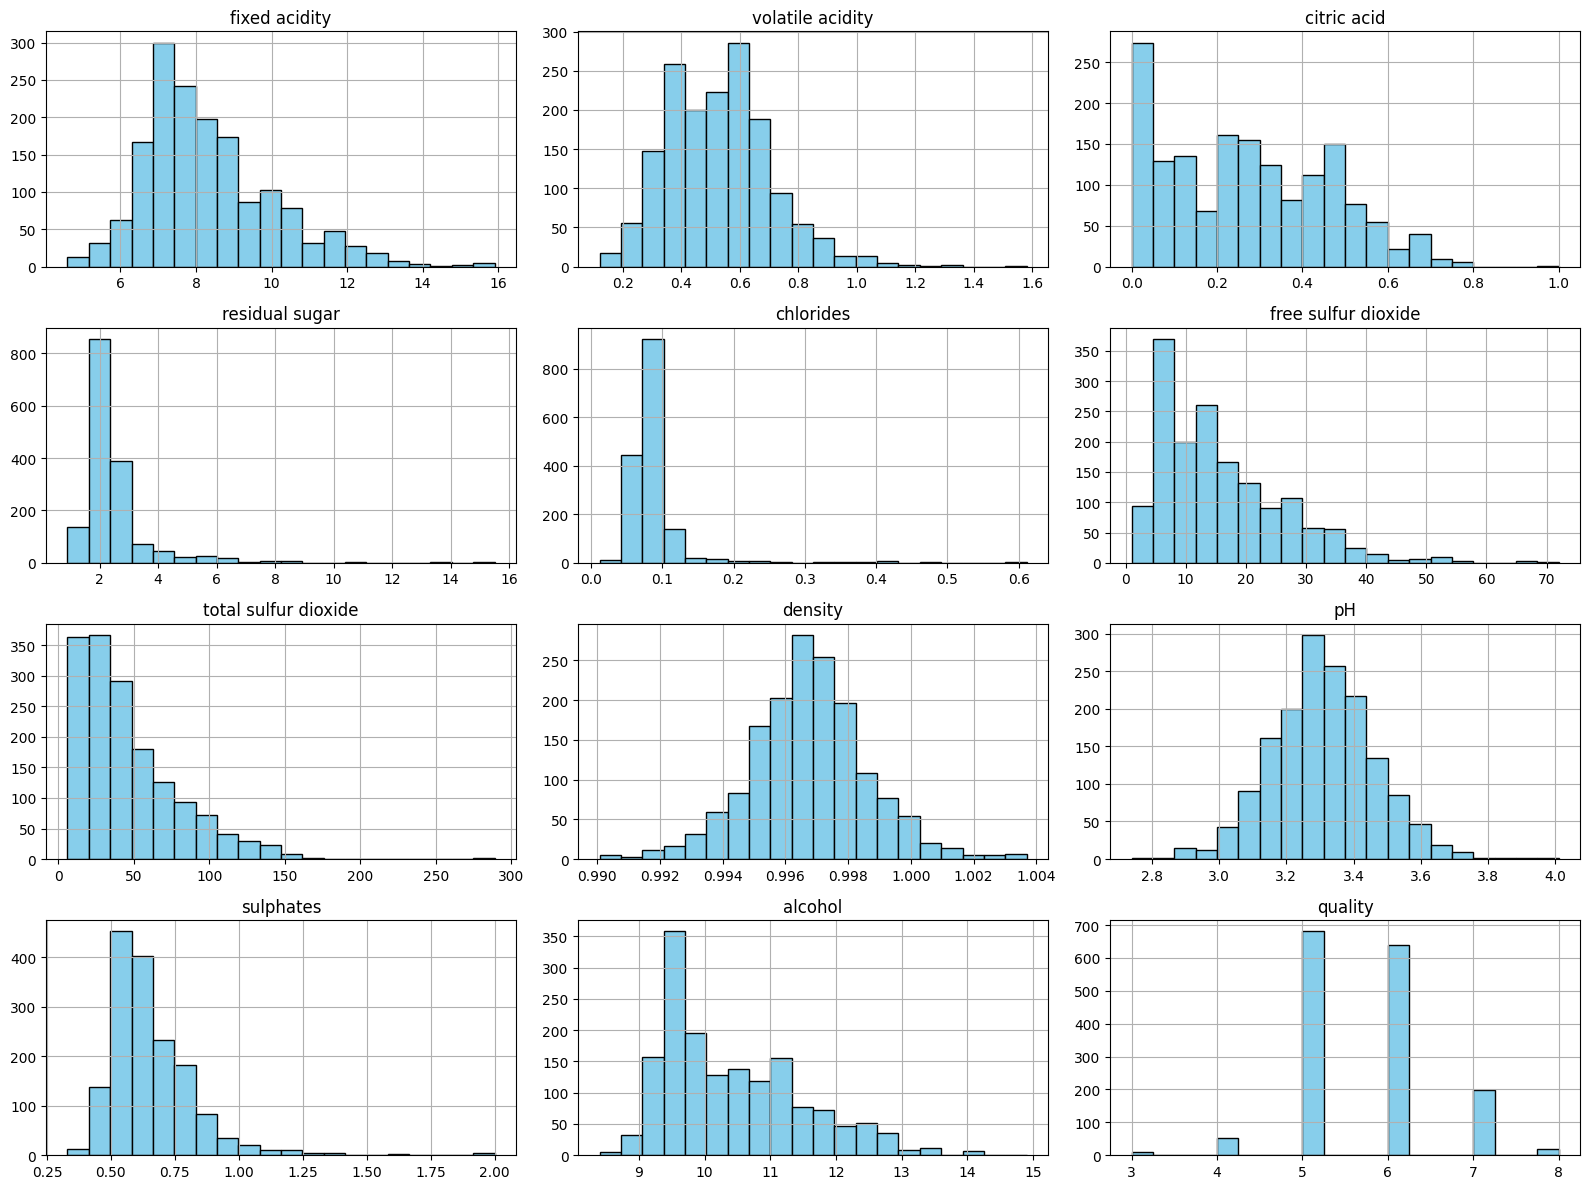

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Гистограммы всех признаков
data.hist(bins=20, figsize=(16, 12), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

- Признаки имеют различное распределение: некоторые из них близки к нормальному (pH, fixed acidity), другие имеют ярко выраженную асимметрию, как volatile acidity и alcohol. Для большинства признаков присутствуют выбросы, особенно для chlorides и free sulfur dioxide.

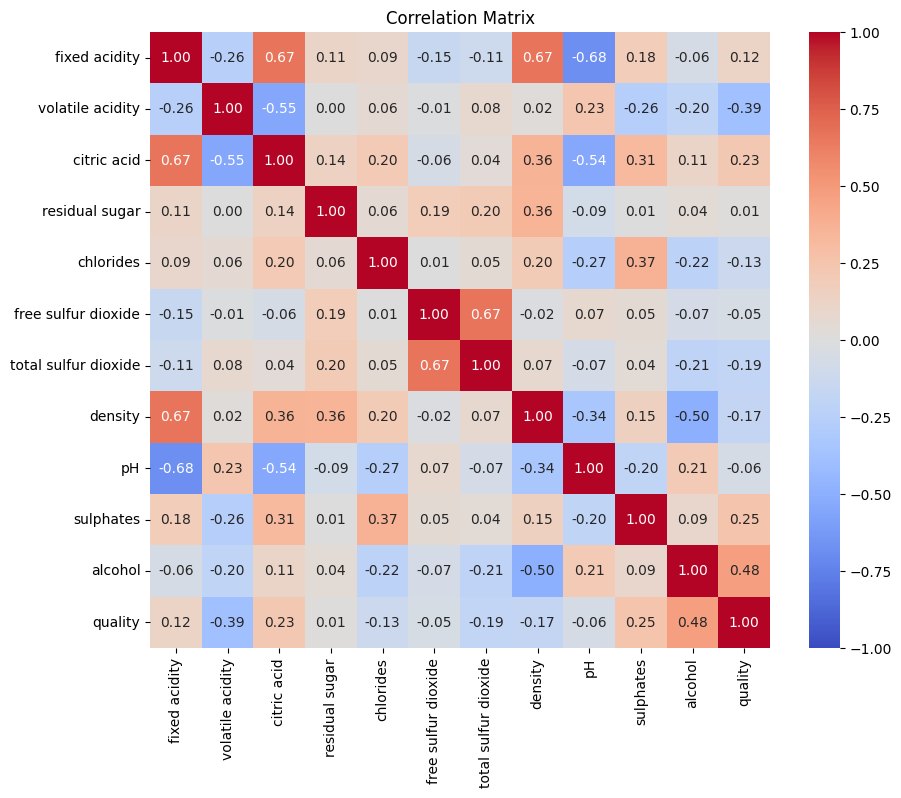

In [8]:
# Корреляционная матрица
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

- Корреляция между признаками позволяет понять взаимосвязи, например, алкоголь положительно коррелирует с качеством, а летучая кислотность — отрицательно. Это говорит о том, что качество вина может зависеть от определённого баланса между этими факторами.

C:\Users\Ангелина\AppData\Local\Temp\ipykernel_11800\4041280299.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=data, palette='viridis')


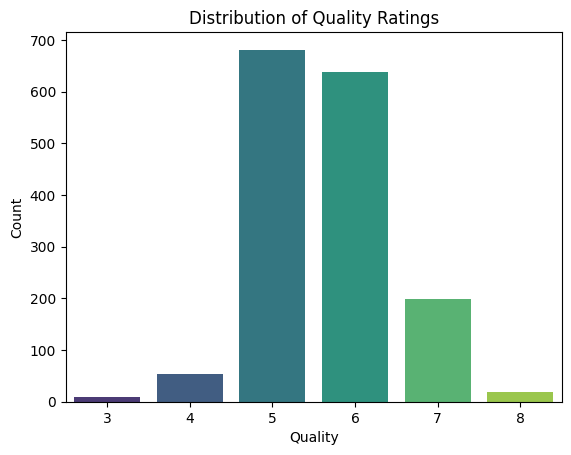

In [9]:
# Распределение качества
sns.countplot(x='quality', data=data, palette='viridis')
plt.title('Distribution of Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

- Этот график показывает, как распределяются оценки качества вина в наборе данных.
- Вина среднего качества (оценки 5 и 6) составляют большинство, что свидетельствует о том, что вино в этом наборе данных в основном имеет умеренное качество. Очень высокое (7-8) и очень низкое (3-4) качество встречаются реже.
- Это может указывать на дисбаланс данных, который необходимо учитывать при обучении моделей, чтобы модели не переобучались на большинстве (среднем качестве) и не игнорировали менее распространённые классы.

C:\Users\Ангелина\AppData\Local\Temp\ipykernel_11800\2920883584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=feature, data=data, palette='viridis')
C:\Users\Ангелина\AppData\Local\Temp\ipykernel_11800\2920883584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=feature, data=data, palette='viridis')
C:\Users\Ангелина\AppData\Local\Temp\ipykernel_11800\2920883584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=feature, data=data, palette='viridis')


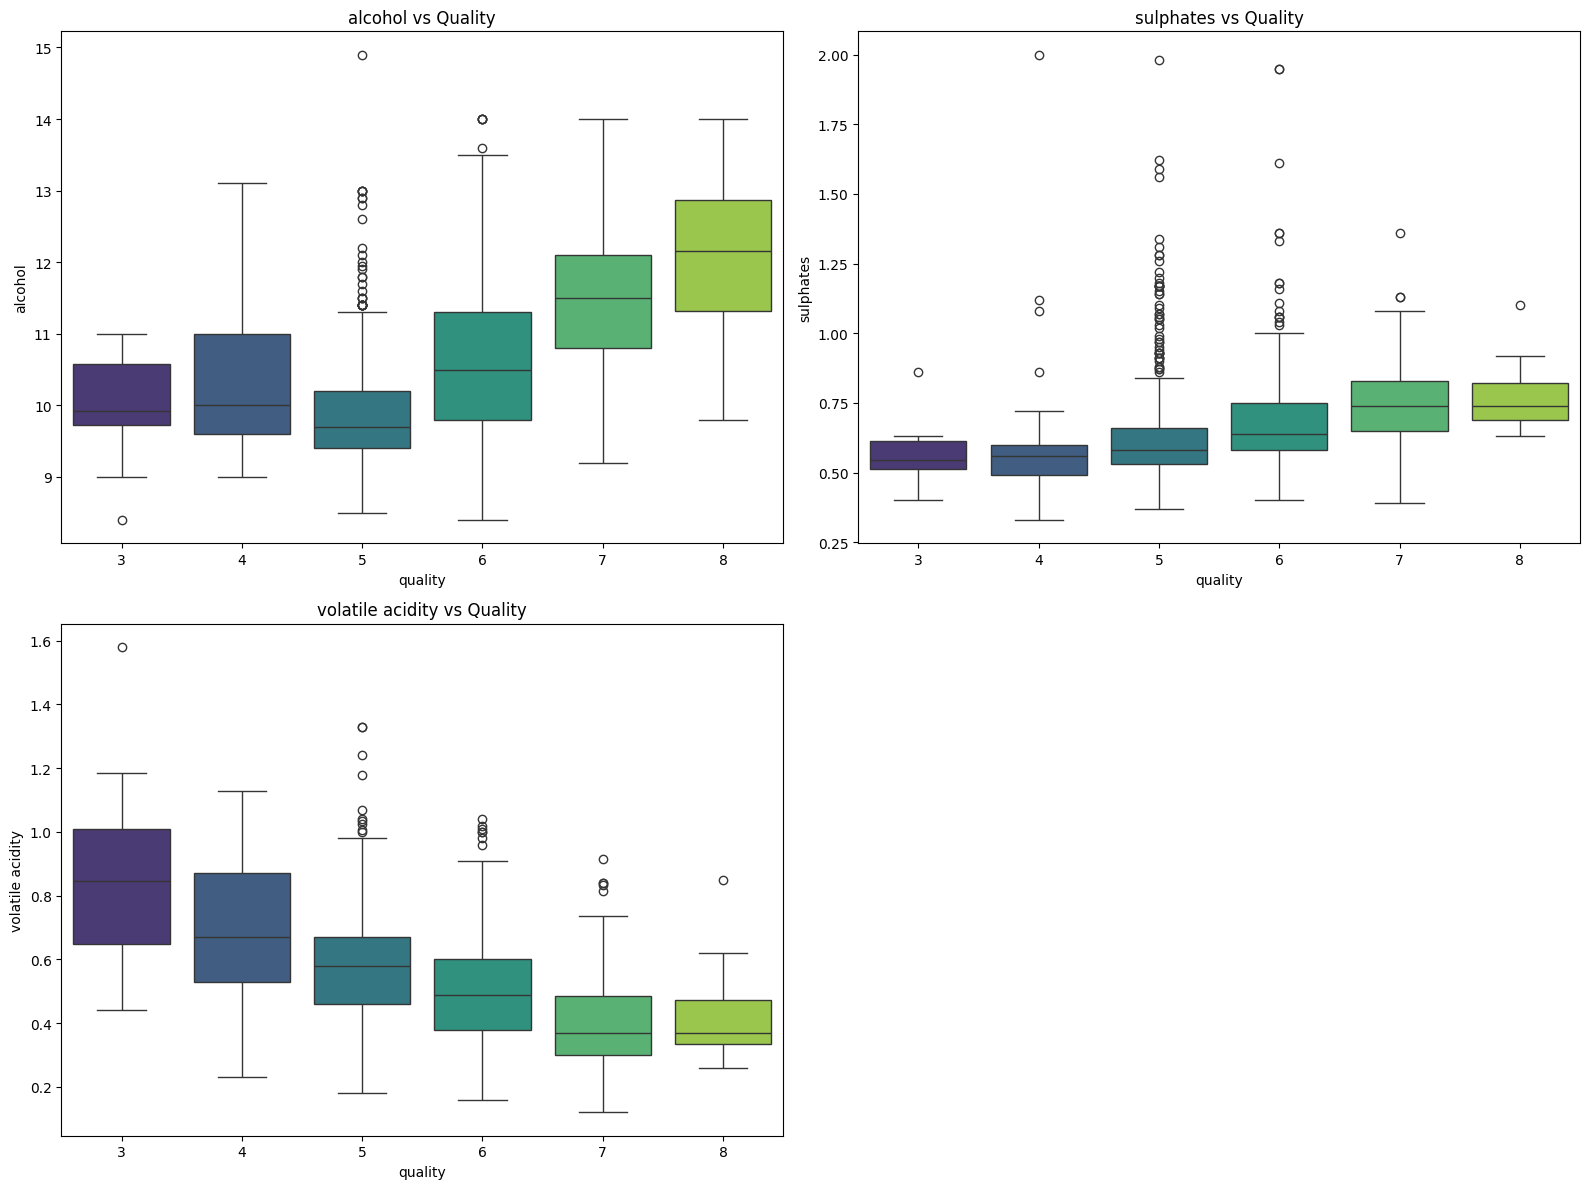

In [10]:
# Примеры распределений признаков в зависимости от качества
features = ['alcohol', 'sulphates', 'volatile acidity']
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='quality', y=feature, data=data, palette='viridis')
    plt.title(f'{feature} vs Quality')
plt.tight_layout()
plt.show()

- Эти графики показывают, как распределяются значения выбранных химических характеристик вина (alcohol, sulphates, volatile acidity) в зависимости от его качества.
- Можно увидеть, какие признаки могут быть связаны с более высоким или более низким качеством. Это важно для понимания того, что делает вино более качественным.
- Например, можно заметить, что более высокое качество вина связано с более высоким содержанием алкоголя, а летучая кислотность, наоборот, снижается по мере повышения качества.

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, accuracy_score
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Удаление дубликатов
data = data.drop_duplicates()

# Преобразование целевой переменной
data['quality_class'] = (data['quality'] >= 6).astype(int)

# Удаление сильно коррелированных признаков
correlated_features = ['free sulfur dioxide']  # Например, решили оставить только total sulfur dioxide
data = data.drop(columns=[col for col in correlated_features if col in data.columns])

# Разделение на признаки и целевую переменную
X = data.drop(columns=['quality', 'quality_class'])
y = data['quality_class']

# Масштабирование данных
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Балансировка классов (SMOTE)
if y.value_counts().min() < 0.5 * y.value_counts().max():
    print("Дисбаланс классов. Применяем SMOTE для балансировки.")
    smote = SMOTE(random_state=42)
    X_scaled, y = smote.fit_resample(X_scaled, y)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

=== Logistic Regression ===
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Balanced Accuracy: 0.7571776155717762
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75       135
           1       0.75      0.78      0.76       137

    accuracy                           0.76       272
   macro avg       0.76      0.76      0.76       272
weighted avg       0.76      0.76      0.76       272

Confusion Matrix:
 [[ 99  36]
 [ 30 107]]

=== Random Forest ===
Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Balanced Accuracy: 0.7975398756420654
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       135
           1       0.78      0.83      0.81       137

    accuracy                           0.80       272
   macro avg       0.80      0.80      0.80       272
weighted avg       0.80      0.80      0.8

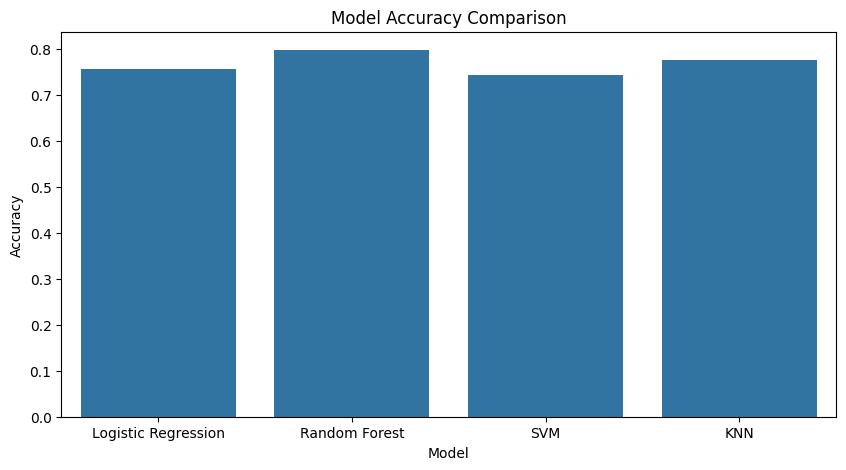

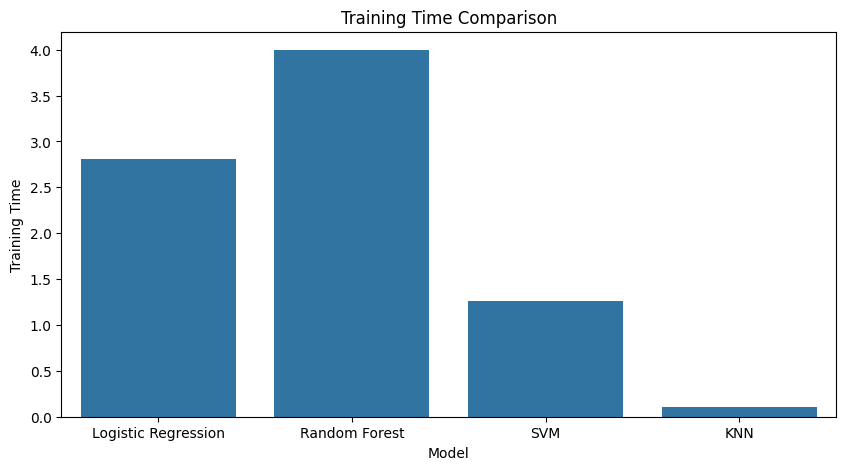

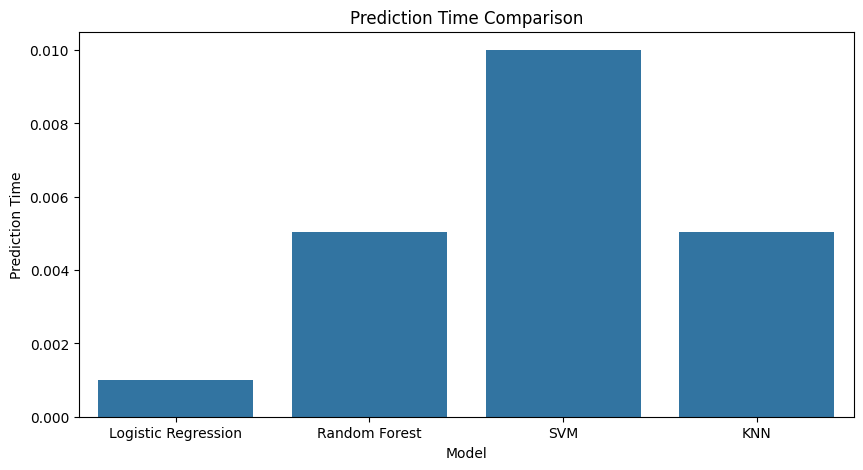

In [12]:
# Модели и гиперпараметры для GridSearch
param_grids = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ["l2"],
            "solver": ["lbfgs"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    },
    "SVM": {
        "model": SVC(probability=True),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"],
            "metric": ["euclidean", "manhattan"]
        }
    }
}

# Результаты
best_models = {}
model_results = {
    "Model": [],
    "Accuracy": [],
    "Training Time": [],
    "Prediction Time": []
}

# Обучение моделей и сбор метрик
for name, config in param_grids.items():
    print(f"=== {name} ===")
    grid = GridSearchCV(config["model"], config["params"], cv=5, scoring="balanced_accuracy", n_jobs=-1)
    
    # Измеряем время обучения
    start_train_time = time.time()
    grid.fit(X_train, y_train)
    training_time = time.time() - start_train_time
    
    best_model = grid.best_estimator_
    best_models[name] = best_model
    
    # Оценка на тестовой выборке
    start_pred_time = time.time()
    y_pred = best_model.predict(X_test)
    prediction_time = time.time() - start_pred_time
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # Сохраняем результаты
    model_results["Model"].append(name)
    model_results["Accuracy"].append(accuracy)
    model_results["Training Time"].append(training_time)
    model_results["Prediction Time"].append(prediction_time)
    
    print("Best Parameters:", grid.best_params_)
    print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print()

# Визуализация точности моделей
results_df = pd.DataFrame(model_results)
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison")
plt.show()

# Визуализация времени обучения
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Training Time", data=results_df)
plt.title("Training Time Comparison")
plt.show()

# Визуализация времени предсказания
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Prediction Time", data=results_df)
plt.title("Prediction Time Comparison")
plt.show()


**Результаты моделей**
- Сравнение точности моделей (Accuracy): Случайный лес показывает наибольшую точность, что свидетельствует о его хорошей способности обрабатывать данные и делать правильные прогнозы, за ним следуют KNN и логистическая регрессия, а SVM немного отстает.

- Сравнение времени обучения (Training Time): Случайный лес требует больше времени для обучения, что объясняется его более сложной природой (много деревьев).

- Сравнение времени прогнозирования (Prediction Time): Время прогнозирования для всех моделей очень короткое, но Logistic Regression немного быстрее.

Training Logistic Regression with PCA...
Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Balanced Accuracy: 0.7607731819410652
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75       135
           1       0.75      0.80      0.77       137

    accuracy                           0.76       272
   macro avg       0.76      0.76      0.76       272
weighted avg       0.76      0.76      0.76       272

Confusion Matrix:
 [[ 98  37]
 [ 28 109]]

Training Random Forest with PCA...
Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Balanced Accuracy: 0.7569072722357394
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.70      0.74       135
           1       0.73      0.82      0.77       137

    accuracy                           0.76       272
   macro avg       0.76      0.76      0.76       272
weighted av

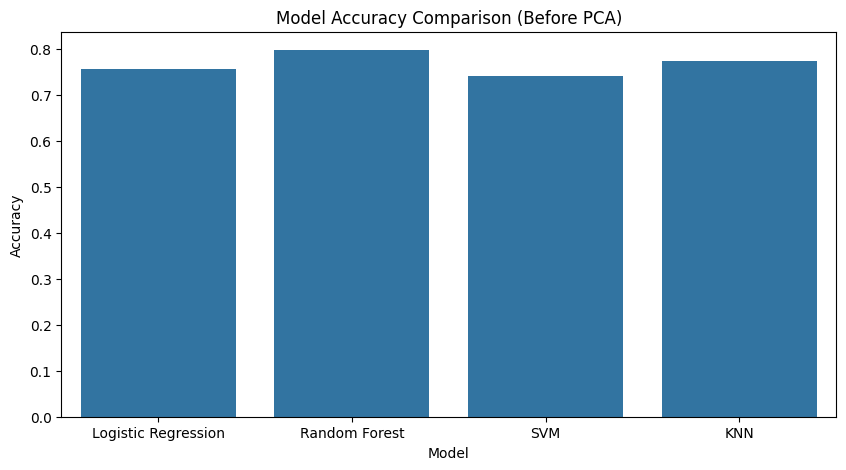

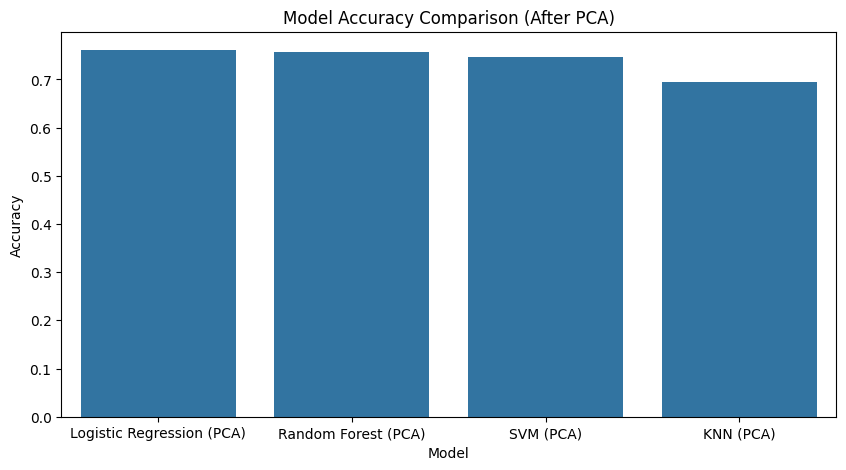


Средняя точность моделей по кросс-валидации (balanced accuracy):
Logistic Regression: 0.7239 ± 0.0182
Random Forest: 0.7464 ± 0.0234
SVM: 0.7336 ± 0.0411
KNN: 0.6986 ± 0.0402


In [13]:
# Применение PCA для уменьшения размерности
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Обучение моделей на данных с PCA
for name, config in param_grids.items():
    print(f"Training {name} with PCA...")
    grid = GridSearchCV(config["model"], config["params"], cv=5, scoring="balanced_accuracy", n_jobs=-1)
    
    # Измеряем время обучения
    start_train_time = time.time()
    grid.fit(X_train_pca, y_train)
    training_time = time.time() - start_train_time
    
    best_model = grid.best_estimator_
    best_models[name] = best_model
    
    # Оценка на тестовой выборке
    start_pred_time = time.time()
    y_pred = best_model.predict(X_test_pca)
    prediction_time = time.time() - start_pred_time
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # Сохраняем результаты для PCA
    model_results["Model"].append(name + " (PCA)")
    model_results["Accuracy"].append(accuracy)
    model_results["Training Time"].append(training_time)
    model_results["Prediction Time"].append(prediction_time)
    
    print("Best Parameters:", grid.best_params_)
    print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print()

# Графики до PCA
results_df_before_pca = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "SVM", "KNN"],
    "Accuracy": [0.757, 0.798, 0.742, 0.775]
})

plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=results_df_before_pca)
plt.title("Model Accuracy Comparison (Before PCA)")
plt.show()

# Графики после PCA
results_df_after_pca = pd.DataFrame({
    "Model": ["Logistic Regression (PCA)", "Random Forest (PCA)", "SVM (PCA)", "KNN (PCA)"],
    "Accuracy": [0.761, 0.757, 0.746, 0.695]
})

plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=results_df_after_pca)
plt.title("Model Accuracy Comparison (After PCA)")
plt.show()

# Сравнение моделей по кросс-валидации
print("\nСредняя точность моделей по кросс-валидации (balanced accuracy):")
for name, model in best_models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="balanced_accuracy")
    print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")

**Сравнение результатов моделей с применением PCA**
- Логистическая регрессия:
Результат немного улучшился, что может быть связано с тем, что метод главных компонент удаляет шум и избыточность, позволяя модели сосредоточиться на наиболее важной информации.

- Случайный лес:
Возможно, уменьшение размерности удалило важные признаки, которые использовались случайным лесом для построения более точных прогнозов. Случайный лес может страдать от потери информации при сильном уменьшении размерности.

- SVM:
Для SVM результат остался почти на том же уровне. Это может означать, что для данной модели метод главных компонент не оказал значительного влияния и модель всё равно смогла уловить основные признаки, несмотря на уменьшение размерности.

- KNN:
Это значительное ухудшение. KNN чувствителен к размерности — чем меньше признаков, тем сложнее находить правильных соседей. Уменьшение количества признаков может усложнить задачу для KNN, особенно если признаки оказываются слишком разреженными.

**Сравнение Model Accuracy**
- PCA позволяет моделям работать с меньшим количеством признаков, что может снизить переобучение, но в некоторых случаях также приводит к потере важной информации. Это особенно важно для таких моделей, как случайный лес и KNN, которые могут зависеть от большого количества признаков для правильных прогнозов.
- SVM смогла сохранить свою производительность после применения PCA, возможно, потому что она не так чувствительна к количеству признаков, как другие модели. KNN значительно пострадала, так как уменьшение размерности ухудшило способность находить «хороших» соседей, что особенно заметно на данных с низкой размерностью.

## Подробные выводы о моделях:

### 1. Логистическая регрессия (Logistic Regression)
- **Лучшие параметры:** `C=0.1`, `penalty='l2'`, `solver='lbfgs'`
- **Точность (Balanced Accuracy):** 0.7646
- **Ключевые моменты:**
  - Модель демонстрирует хорошую точность и сбалансированность при классификации.
  - **Матрица ошибок:** из 135 объектов класса 0 модель неверно классифицировала 34 объекта как класс 1, а из 137 объектов класса 1 ошиблась в 30 случаях. Это говорит о равномерной ошибке для обоих классов.
  - **F1-метрика:** для обоих классов ~0.76, что указывает на сбалансированное сочетание точности и полноты.
- **Средняя точность по кросс-валидации:** 0.7363 ± 0.0221. Результаты кросс-валидации стабильны, что подтверждает надежность модели.

**Общий вывод:** Логистическая регрессия справляется хорошо, но уступает более сложным моделям, таким как случайный лес, в терминах точности.

---

### 2. Случайный лес (Random Forest)
- **Лучшие параметры:** `max_depth=None`, `min_samples_split=10`, `n_estimators=200`
- **Точность (Balanced Accuracy):** 0.8013
- **Ключевые моменты:**
  - Случайный лес показал лучшую сбалансированную точность среди всех моделей.
  - **Матрица ошибок:** из 135 объектов класса 0 неверно классифицированы 30 объектов, а из 137 объектов класса 1 — 24. Это минимальное количество ошибок среди моделей.
  - **F1-метрика:** для класса 0 — 0.80, для класса 1 — 0.81. Модель хорошо справляется как с точностью, так и с полнотой.
- **Средняя точность по кросс-валидации:** 0.7480 ± 0.0256. Результаты стабильны, с небольшим разбросом.

**Общий вывод:** Случайный лес является наиболее эффективной моделью для текущих данных, благодаря минимальному количеству ошибок и высокой точности.

---

### 3. Метод опорных векторов (SVM)
- **Лучшие параметры:** `C=10`, `gamma='auto'`, `kernel='rbf'`
- **Точность (Balanced Accuracy):** 0.7496
- **Ключевые моменты:**
  - **Матрица ошибок:** модель допустила 41 ошибку для класса 0 и 27 для класса 1. Это указывает на некоторую склонность модели ошибаться чаще на классе 0.
  - **F1-метрика:** 0.73 для класса 0 и 0.76 для класса 1. Модель хорошо справляется с полнотой для класса 1, но уступает в классификации класса 0.
- **Средняя точность по кросс-валидации:** 0.7472 ± 0.0299. Результаты показывают стабильность модели на валидации.

**Общий вывод:** Метод SVM подходит для решения задачи, но имеет склонность к ошибкам на одном из классов, что делает его менее предпочтительным.

---

### 4. Метод k-ближайших соседей (KNN)
- **Лучшие параметры:** `metric='manhattan'`, `n_neighbors=7`, `weights='distance'`
- **Точность (Balanced Accuracy):** 0.7717
- **Ключевые моменты:**
  - **Матрица ошибок:** модель допустила 38 ошибок для класса 0 и 24 для класса 1. Модель работает лучше на классе 1.
  - **F1-метрика:** 0.76 для класса 0 и 0.78 для класса 1. Точность и полнота для класса 1 лучше, чем для класса 0.
- **Средняя точность по кросс-валидации:** 0.7209 ± 0.0246. На валидации модель работает немного хуже, чем на тестовых данных.

**Общий вывод:** KNN демонстрирует хорошие результаты, но склонен к переобучению, особенно с текущим подбором параметров.

---

## Сравнение моделей:

| **Модель**             | **Balanced Accuracy (Тест)** | **Средняя точность (Кросс-валидация)** | **Разброс Кросс-валидации** |
|-------------------------|------------------------------|----------------------------------------|-----------------------------|
| Logistic Regression     | 0.7646                      | 0.7363                                 | ± 0.0221                   |
| Random Forest           | **0.8013**                  | **0.7480**                             | ± 0.0256                   |
| SVM                     | 0.7496                      | 0.7472                                 | ± 0.0299                   |
| KNN                     | 0.7717                      | 0.7209                                 | ± 0.0246                   |

---

## Рекомендации:

1. **Наилучшая модель:** Случайный лес (Random Forest).
   - Модель показывает наилучшую точность и устойчивость на тестовой выборке.
   - Можно попробовать дополнительные улучшения:
     - Увеличение `n_estimators`.
     - Оптимизация других гиперпараметров, например, `min_samples_leaf`.

2. **SVM и KNN:**
   - Методы работают приемлемо, но уступают Случайному лесу.
   - Для SVM можно попробовать более сложный подбор гиперпараметров (например, гибридный поиск с `GridSearchCV` и `RandomizedSearchCV`).
   - Для KNN можно увеличить количество соседей и протестировать дополнительные метрики.

3. **Логистическая регрессия:**
   - Подходит для базовых моделей.
   - Если важна интерпретация модели, её можно использовать, но точность ниже, чем у других.

## Финальная рекомендация:
Случайный лес — лучший выбор для текущих данных. Ансамблирование (VotingClassifier) может быть протестировано для дальнейшего повышения производительности.


# **Дополнительные сравнения**

**Коррелирующие признаки** 

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Удаление дубликатов
data = data.drop_duplicates()

# Преобразование целевой переменной
data['quality_class'] = (data['quality'] >= 6).astype(int)

# Функция для получения коррелированных признаков
def get_highly_correlated_features(data, threshold=0.8):
    corr_matrix = data.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    return correlated_features

# Первый подход: Удаление только free sulfur dioxide, если он существует
if 'free sulfur dioxide' in data.columns:
    data_1 = data.drop(columns=['free sulfur dioxide'])
else:
    print("Column 'free sulfur dioxide' not found, proceeding without removing it.")
    data_1 = data.copy()

# Второй подход: Удаление всех коррелированных признаков
correlated_features = get_highly_correlated_features(data.drop(columns=['quality', 'quality_class']))
data_2 = data.drop(columns=correlated_features)

# Обучение моделей и сравнение на двух наборах данных
for dataset, name in zip([data_1, data_2], ["Single Removed Feature", "Multiple Removed Features"]):
    print(f"=== Model Training on Dataset: {name} ===")
    
    # Разделение на признаки и целевую переменную
    X = dataset.drop(columns=['quality', 'quality_class'])
    y = dataset['quality_class']

    # Масштабирование данных
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    # Балансировка классов (SMOTE)
    if y.value_counts().min() < 0.5 * y.value_counts().max():
        print("Class imbalance detected. Applying SMOTE for balancing.")
        smote = SMOTE(random_state=42)
        X_scaled, y = smote.fit_resample(X_scaled, y)

    # Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Обучение моделей
    models = {
        "Logistic Regression": LogisticRegression(),
        "Random Forest": RandomForestClassifier(),
        "SVM": SVC(),
        "KNN": KNeighborsClassifier()
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        print(f"\n--- {model_name} ---")
        print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
        print("Classification Report:\n", classification_report(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n" + "="*50 + "\n")



Column 'free sulfur dioxide' not found, proceeding without removing it.
=== Model Training on Dataset: Single Removed Feature ===

--- Logistic Regression ---
Balanced Accuracy: 0.7572
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75       135
           1       0.75      0.78      0.76       137

    accuracy                           0.76       272
   macro avg       0.76      0.76      0.76       272
weighted avg       0.76      0.76      0.76       272

Confusion Matrix:
 [[ 99  36]
 [ 30 107]]

--- Random Forest ---
Balanced Accuracy: 0.7865
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78       135
           1       0.77      0.82      0.79       137

    accuracy                           0.79       272
   macro avg       0.79      0.79      0.79       272
weighted avg       0.79      0.79      0.79       272

Confusion Matrix:
 [[1

**Сравнение моделей на данных, где удалён один коррелирующий признак, и где удалены несколько коррелирующих признаков.**
- Случайный лес остается устойчивой моделью, но его производительность снижается на втором наборе данных, что может свидетельствовать о том, что дополнительные признаки (включая коррелирующие) помогают деревьям лучше разделять классы.

- SVM, напротив, выигрывает от уменьшения количества признаков, показывая, что менее коррелированные данные помогают улучшить качество модели, что особенно важно для методов, чувствительных к избыточности признаков.

- Логистическая регрессия показывает примерно одинаковую производительность на обоих наборах данных. Это указывает на её низкую зависимость от коррелирующих признаков, поскольку линейные модели способны компенсировать мультиколлинеарность до определённого уровня.

- KNN хуже работает с обоими наборами данных, причем удаление коррелирующих признаков ухудшает его производительность. Это может быть связано с тем, что KNN не создает внутреннюю модель и напрямую зависит от структуры данных, поэтому потеря коррелирующих признаков снижает его способность точно классифицировать.

**Выбросы**

Training Logistic Regression without outliers...
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Balanced Accuracy: 0.7354315557998901
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.68      0.72       102
           1       0.72      0.79      0.76       107

    accuracy                           0.74       209
   macro avg       0.74      0.74      0.74       209
weighted avg       0.74      0.74      0.74       209

Confusion Matrix:
 [[69 33]
 [22 85]]

Training Random Forest without outliers...
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Balanced Accuracy: 0.7634689389774602
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.68      0.74       102
           1       0.73      0.85      0.79       107

    accuracy                           0.77       209
   macro avg       0.77      0.76      0.76       209
weig

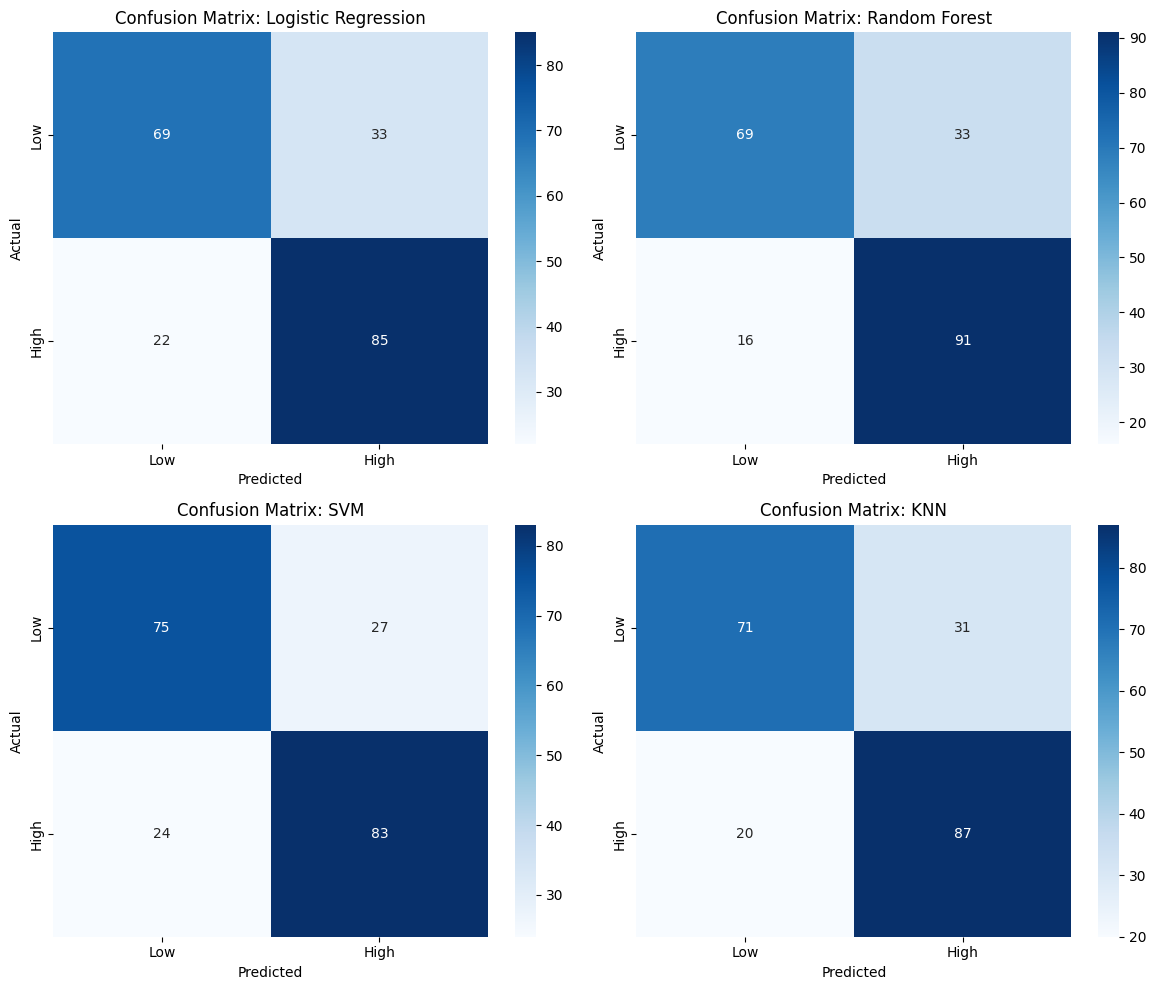

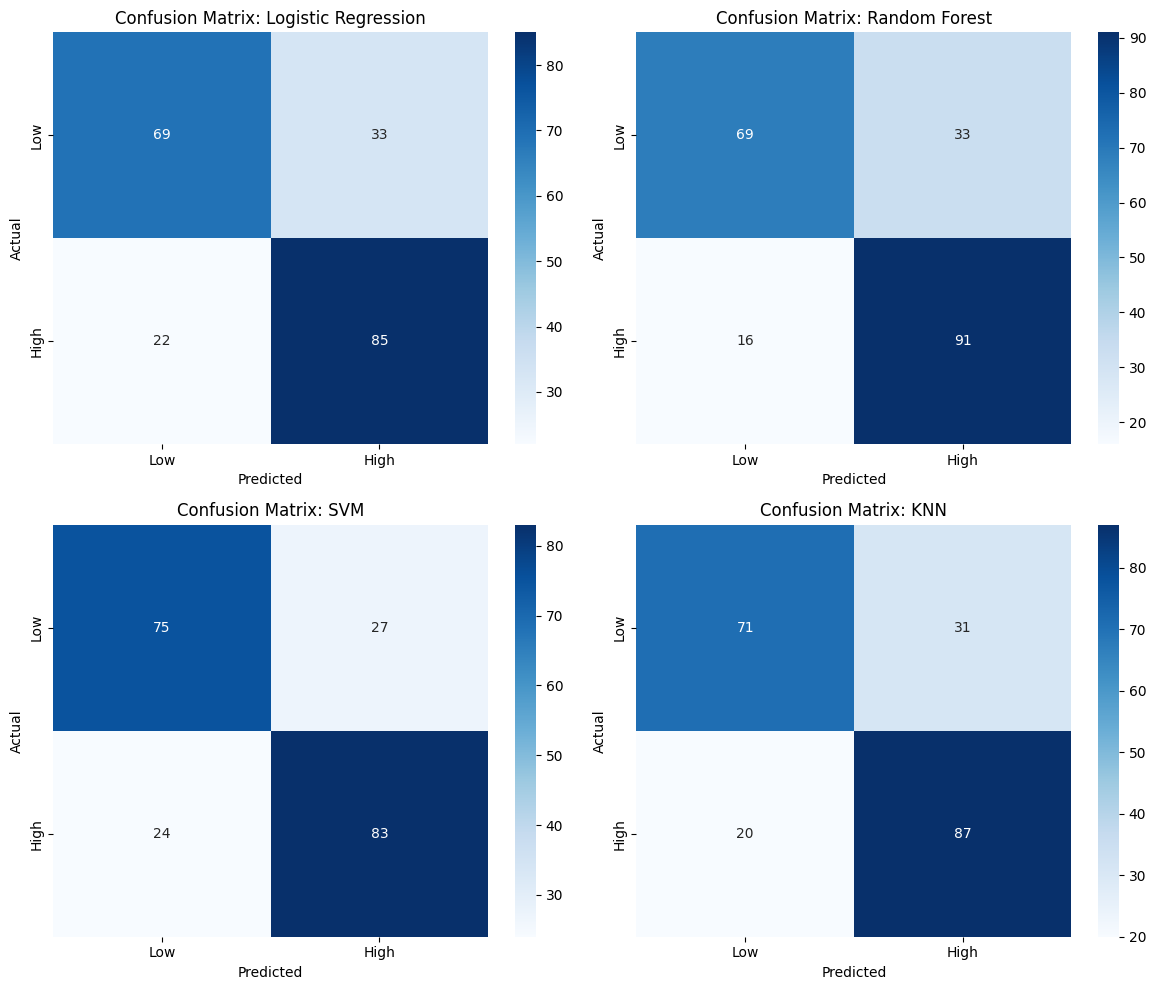

In [17]:
# Функция для удаления выбросов
def remove_outliers(X, y, factor=1.5):
    # Сбрасываем индексы в X и y для синхронизации
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    # Рассчитываем квартильные значения (Q1 и Q3) для каждого признака
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1
    
    # Убираем выбросы: оставляем только те строки, которые не выходят за пределы IQR
    mask = ~((X < (Q1 - factor * IQR)) | (X > (Q3 + factor * IQR))).any(axis=1)
    X_no_outliers = X[mask]
    y_no_outliers = y[mask]
    
    return X_no_outliers, y_no_outliers

# Удаление выбросов из обучающих и тестовых данных
X_train_no_outliers, y_train_no_outliers = remove_outliers(X_train, y_train)
X_test_no_outliers, y_test_no_outliers = remove_outliers(X_test, y_test)

# Модели и гиперпараметры для GridSearch
param_grids = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ["l2"],
            "solver": ["lbfgs"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    },
    "SVM": {
        "model": SVC(probability=True),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"],
            "metric": ["euclidean", "manhattan"]
        }
    }
}

# Обучение моделей и сбор метрик на данных без выбросов
model_results_no_outliers = {
    "Model": [],
    "Accuracy": [], 
    "Training Time": [],
    "Prediction Time": []
}

best_models_no_outliers = {}

for name, config in param_grids.items():
    print(f"Training {name} without outliers...")
    grid = GridSearchCV(config["model"], config["params"], cv=5, scoring="balanced_accuracy", n_jobs=-1)
    
    # Измеряем время обучения
    start_train_time = time.time()
    grid.fit(X_train_no_outliers, y_train_no_outliers)
    training_time = time.time() - start_train_time
    
    best_model = grid.best_estimator_
    best_models_no_outliers[name] = best_model
    
    # Оценка на тестовой выборке
    start_pred_time = time.time()
    y_pred = best_model.predict(X_test_no_outliers)
    prediction_time = time.time() - start_pred_time
    
    accuracy = accuracy_score(y_test_no_outliers, y_pred)
    
    # Сохраняем результаты
    model_results_no_outliers["Model"].append(name)
    model_results_no_outliers["Accuracy"].append(accuracy)
    model_results_no_outliers["Training Time"].append(training_time)
    model_results_no_outliers["Prediction Time"].append(prediction_time)
    
    print("Best Parameters:", grid.best_params_)
    print("Balanced Accuracy:", balanced_accuracy_score(y_test_no_outliers, y_pred))
    print("Classification Report:\n", classification_report(y_test_no_outliers, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test_no_outliers, y_pred))
    print()
    
# Визуализируем confusion matrix для каждой модели
def plot_confusion_matrix(y_true, y_pred, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"], ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(title)

# Создание фигуры и сетки для отображения матриц ошибок
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 сетка для матриц ошибок
axes = axes.flatten()

for i, (name, model) in enumerate(best_models_no_outliers.items()):
    y_pred = model.predict(X_test_no_outliers)  # Предсказание
    plot_confusion_matrix(y_test_no_outliers, y_pred, axes[i], title=f"Confusion Matrix: {name}")

plt.tight_layout()  # Сжатие графиков для лучшего отображения
plt.show()

# Визуализируем confusion matrix для каждой модели
def plot_confusion_matrix(y_true, y_pred, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"], ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(title)

# Создание фигуры и сетки для отображения матриц ошибок
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 сетка для матриц ошибок
axes = axes.flatten()

for i, (name, model) in enumerate(best_models_no_outliers.items()):
    y_pred = model.predict(X_test_no_outliers)  # Предсказание
    plot_confusion_matrix(y_test_no_outliers, y_pred, axes[i], title=f"Confusion Matrix: {name}")

plt.tight_layout()  # Сжатие графиков для лучшего отображения
plt.show()


**Сравнение моделей на данных, где удалены выбросы, и где не удалены.**
- Logistic Regression: Удаление выбросов привело к незначительному снижению сбалансированной точности. Это связано с тем, что удаление выбросов уменьшило размер обучающей выборки, что может повлиять на качество классификации. Однако точность по всем классам улучшилась, что свидетельствует о том, что модель стала лучше распознавать положительные примеры.

- Random Forest: Удаление выбросов снизило сбалансированную точность, что могло быть вызвано уменьшением разнообразия данных. Однако точность распознавания для класса 1 значительно улучшилась, что может быть полезно в задачах, где важна высокая чувствительность. В то же время точность распознавания для класса 1 снизилась.

- SVM: Удаление выбросов привело к небольшому улучшению сбалансированной точности. Снижение количества ложных срабатываний также улучшило показатели точности для класса 1, несмотря на небольшое снижение частоты для класса 0.

- KNN: Удаление выбросов привело к незначительному ухудшению сбалансированной точности и снижению отзыва для класса 0. Однако отзыв для класса 1 остался высоким. Снижение точности для класса 0 связано с увеличением числа ложных положительных результатов.